In [3]:
%pylab inline
import pymc as pm

Populating the interactive namespace from numpy and matplotlib


In [8]:
parameter = pm.Exponential("parameter", 1)
data_generator = pm.Poisson("data_generator", parameter)
data_plus_one = data_generator + 1

In [9]:
print parameter.children
print
print data_generator.parents
print
print data_generator.children

set([<pymc.distributions.Poisson 'data_generator' at 0x109cff2d0>])

{'mu': <pymc.distributions.Exponential 'parameter' at 0x109cff290>}

set([<pymc.PyMCObjects.Deterministic '(data_generator_add_1)' at 0x109cff350>])


In [10]:
print "parameter.value = ", parameter.value
print "data_generator.value = ", data_generator.value
print "data_plus_one.value = ", data_plus_one.value

parameter.value =  2.14041160128
data_generator.value =  0
data_plus_one.value =  1


In [12]:
# to get information about the class-specific initialization variables,
# use classname?? (or http://pymc-devs.github.io/pymc/distributions.html)
pm.Exponential??

In [22]:
lambdas = pm.Exponential("lambdas", 1, size=2)
tau = pm.DiscreteUniform("tau", lower=0, upper=10)

print "lambdas[0].value = %.3f" % lambdas[0].value
print "lambdas[1].value = %.3f" % lambdas[1].value
print "tau.value = %.3f" % tau.value
print

lambdas.random(), tau.random()

print "After calling random() on the variables..."
print "lambdas[0].value = %.3f" % lambdas[0].value
print "lambdas[1].value = %.3f" % lambdas[1].value
print "tau.value = %.3f" % tau.value

lambdas[0].value = 0.263
lambdas[1].value = 0.602
tau.value = 10.000

After calling random() on the variables...
lambdas[0].value = 0.533
lambdas[1].value = 0.484
tau.value = 9.000


In [67]:
# we can create PyMC variables that act like the stochastic variables
# we've already seen, by defining a function - the function can be
# treated as a PyMC variable from then on out
@pm.deterministic
def lambda_(tau=tau, lambdas=lambdas):
    out = np.zeros(5)
    out[:tau] = lambdas[0]
    out[tau:] = lambdas[1]
    return out

In [32]:
lambdas[0]

<pymc.CommonDeterministics.Index 'lambdas[0]' at 0x109d8e3d0>

In [33]:
lambda_[47]

<pymc.CommonDeterministics.Index 'lambda_[47]' at 0x109d81ad0>

In [34]:
print lambda_[0].value
print lambda_[1].value

print tau.value

print lambda_[tau.value - 1].value
print lambda_[tau.value].value
print lambda_[tau.value + 1].value

0.533003045162
0.533003045162
9
0.533003045162
0.4837735037
0.4837735037


In [35]:
lambda_.parents

{'lambdas': <pymc.distributions.Exponential 'lambdas' at 0x109da1a90>,
 'tau': <pymc.distributions.DiscreteUniform 'tau' at 0x109da1a50>}

In [36]:
lambda_.children

{<pymc.CommonDeterministics.Index 'lambda_[8]' at 0x109de37d0>,
 <pymc.CommonDeterministics.Index 'lambda_[0]' at 0x109de3710>,
 <pymc.CommonDeterministics.Index 'lambda_[1]' at 0x109de36d0>,
 <pymc.CommonDeterministics.Index 'lambda_[47]' at 0x109d81ad0>,
 <pymc.CommonDeterministics.Index 'lambda_[10]' at 0x109de3890>,
 <pymc.PyMCObjects.Deterministic 'lambda_[9]' at 0x109de3810>}

In [37]:
tau.parents

{'lower': 0, 'upper': 10}

In [38]:
tau.children

{<pymc.PyMCObjects.Deterministic 'lambda_' at 0x109da10d0>,
 <pymc.PyMCObjects.Deterministic 'lambda_' at 0x109de3410>}

In [39]:
lambdas.parents

{'beta': 1}

In [40]:
lambdas.children

{<pymc.CommonDeterministics.Index 'lambdas[0]' at 0x109d8e3d0>,
 <pymc.CommonDeterministics.Index 'lambdas[0]' at 0x103e314d0>,
 <pymc.PyMCObjects.Deterministic 'lambda_' at 0x109da10d0>,
 <pymc.CommonDeterministics.Index 'lambdas[1]' at 0x109da1cd0>,
 <pymc.CommonDeterministics.Index 'lambdas[0]' at 0x109da1c90>,
 <pymc.PyMCObjects.Deterministic 'lambda_' at 0x109de3410>,
 <pymc.CommonDeterministics.Index 'lambdas[0]' at 0x109d81a50>,
 <pymc.CommonDeterministics.Index 'lambdas[1]' at 0x109da1c10>}

(0, 8)

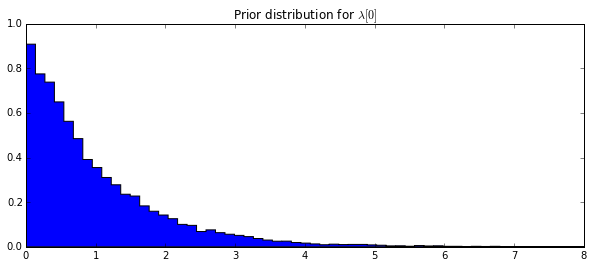

In [59]:
figsize(10, 4)

samples = [lambdas.random()[0] for i in range(20000)] # note that i have to call random on the parent variable to get an array of random vars and then index to 0, instead of indexing first to get a single random variable and then calling random()
plt.hist(samples, bins=70, normed=True, histtype="stepfilled")
plt.title("Prior distribution for $\lambda[0]$")
plt.xlim(0, 8)

In [60]:
data = np.array([10, 5])
fixed_variable = pm.Poisson("fixed_variable", 1, value=data, observed=True)
print "value: ", fixed_variable.value
print "calling .random()"
fixed_variable.random()
print "value: ", fixed_variable.value

value:  [10  5]
calling .random()
value:  [10  5]


In [68]:
data = np.array([10, 25, 15, 20, 35])
obs = pm.Poisson("obs", lambda_, value=data, observed=True)
print obs.value

[10 25 15 20 35]


In [70]:
model = pm.Model([obs, lambdas, tau])

In [98]:
tau = pm.rdiscrete_uniform(0, 80)
tau

71

In [99]:
alpha = 1./20.
lambda_1, lambda_2 = pm.rexponential(alpha, 2)
print lambda_1, lambda_2

2.81569521939 36.4975350517


In [100]:
data = np.r_[pm.rpoisson(lambda_1, tau), pm.rpoisson(lambda_2, 80 - tau)]

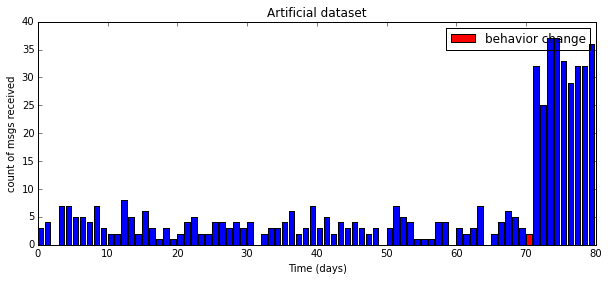

In [101]:
plt.bar(np.arange(80), data)
plt.bar(tau - 1, data[tau - 1], color='r', label='behavior change')
plt.xlabel('Time (days)')
plt.ylabel('count of msgs received')
plt.title('Artificial dataset')
plt.xlim(0, 80)
plt.legend()

In [106]:
def plot_artificial_sms_dataset():
    tau = pm.rdiscrete_uniform(0, 80)
    alpha = 1. / 20.
    lambda_1, lambda_2 = pm.rexponential(alpha, 2)
    data = np.r_[pm.rpoisson(lambda_1, tau), pm.rpoisson(lambda_2, 80 - tau)]
                 
    plt.bar(np.arange(80), data)
    plt.bar(tau - 1, data[tau - 1], color='r', label='behavior change')
    plt.xlim(0, 80)

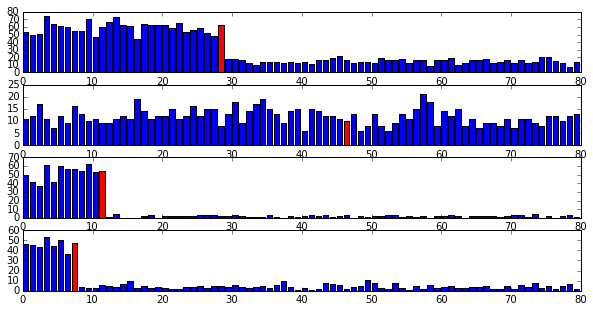

In [108]:
figsize(10, 5)
plt.title('Many examples')
for i in range(4):
    plt.subplot(4, 1, i)
    plot_artificial_sms_dataset()

We did the simple single parameter bernoulli example above, so we skip to the A and B example here.

In [153]:
true_p_A = 0.05
true_p_B = 0.04

N_A = 1500
N_B = 750

observations_A = pm.rbernoulli(true_p_A, N_A)
observations_B = pm.rbernoulli(true_p_B, N_B)
print "Obs from site A: ", observations_A[:20].astype(int), "..."
print "Obs from site B: ", observations_B[:20].astype(int), "..."

Obs from site A:  [1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] ...
Obs from site B:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] ...


In [154]:
print observations_A.mean()
print observations_B.mean()
# mean() works here to give us the actual proportion because we have 
# a seq of 0s and 1s, and (1 / n) * (sum of 1s) = the proportion

0.052
0.0306666666667


In [155]:
p_A = pm.Uniform("p_A", 0, 1)
p_B = pm.Uniform("p_B", 0, 1)

@pm.deterministic
def delta(p_A=p_A, p_B=p_B):
    return p_A - p_B

In [156]:
p_A.children

{<pymc.PyMCObjects.Deterministic 'delta' at 0x11e36e9d0>}

In [157]:
delta.children

set()

In [158]:
delta.parents

{'p_A': <pymc.distributions.Uniform 'p_A' at 0x10a7cdf50>,
 'p_B': <pymc.distributions.Uniform 'p_B' at 0x10a7cda50>}

In [159]:
obs_A = pm.Bernoulli("obs_A", p_A, value=observations_A, observed=True)
obs_B = pm.Bernoulli("obs_B", p_B, value=observations_B, observed=True)

mcmc = pm.MCMC([p_A, p_B, delta, obs_A, obs_B])
mcmc.sample(20000, 1000)

 [-----------------100%-----------------] 20000 of 20000 complete in 2.1 sec

In [160]:
p_A_samples = mcmc.trace("p_A")[:]
p_B_samples = mcmc.trace("p_B")[:]
delta_samples = mcmc.trace("delta")[:]

In [161]:
p_A_samples

array([ 0.05596755,  0.05596755,  0.05596755, ...,  0.05412372,
        0.05412372,  0.05412372])

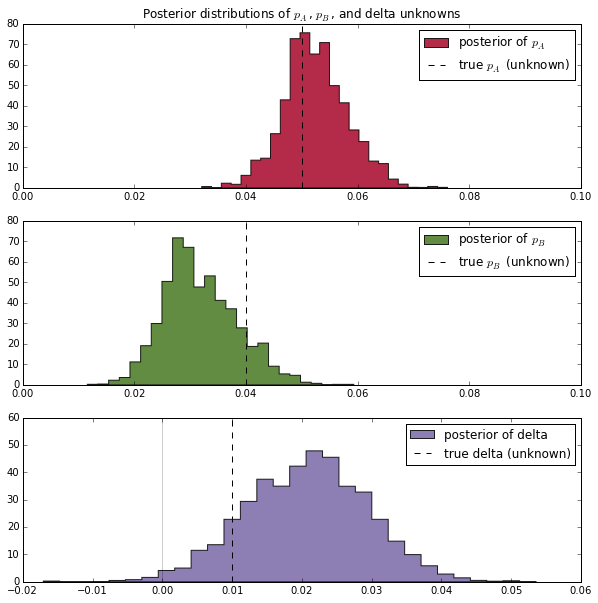

In [162]:
figsize(10, 10)

ax = plt.subplot(311)
plt.xlim(0, .1)
plt.hist(p_A_samples, histtype='stepfilled', bins=25, alpha=0.85,
         label="posterior of $p_A$", color="#A60628", normed=True)
plt.vlines(true_p_A, 0, 80, linestyle="--", label="true $p_A$ (unknown)")
plt.legend(loc="upper right")
plt.title("Posterior distributions of $p_A$, $p_B$, and delta unknowns")

ax = plt.subplot(312)
plt.xlim(0, .1)
plt.hist(p_B_samples, histtype='stepfilled', bins=25, alpha=0.85,
         label="posterior of $p_B$", color="#467821", normed=True)
plt.vlines(true_p_B, 0, 80, linestyle="--", label="true $p_B$ (unknown)")
plt.legend(loc="upper right")

ax = plt.subplot(313)
plt.hist(delta_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="posterior of delta", color="#7A68A6", normed=True)
plt.vlines(true_p_A - true_p_B, 0, 60, linestyle="--",
           label="true delta (unknown)")
plt.vlines(0, 0, 60, color="black", alpha=0.2)
plt.legend(loc="upper right");

In [163]:
print 'Prob that site A is worse than site B: %.3f' % (delta_samples < 0).mean()
print 'Prob that site B is worse than site A: %.3f' % (delta_samples > 0).mean()
# my guess is that mean works here for the same reason it does above:
# we get 1/n * the sum of the trues.

Prob that site A is worse than site B: 0.009
Prob that site B is worse than site A: 0.991


#Cheating 

In [208]:
N = 100
p = pm.Uniform("freq_cheating", 0, 1)

In [209]:
true_answers = pm.Bernoulli('truths', p, size=N)

In [210]:
first_coin_flips = pm.Bernoulli("first_coin_flips", 0.5, size=N)
second_coin_flips = pm.Bernoulli("second_coin_flips", 0.5, size=N)
print (first_coin_flips.value).mean()
print (second_coin_flips.value).mean()

0.47
0.49


In [211]:
@pm.deterministic
def observed_proportion(t_a=true_answers,
                        fc=first_coin_flips,
                        sc=second_coin_flips):
    # we see the true answer if the first coin flip is true,
    # and the second coin flip if the first coin flip is false
    # i think this is doing matrix/array multiplication: ie, we're
    # multiplying the first element of fc by the first element of 
    # t_a and the inverse of the first element of fc by the first
    # element of sc, and same for element two, three, etc.
    observed = fc * t_a + (1 - fc) * sc
    return observed.sum() / float(N)

In [212]:
observed_proportion.value

0.40000000000000002

In [213]:
X = 35
observations = pm.Binomial('observations', N, 
                           observed_proportion, observed=True,
                           value = X)

In [214]:
observations.parents

{'n': 100,
 'p': <pymc.PyMCObjects.Deterministic 'observed_proportion' at 0x11fdc9110>}

In [215]:
observed_proportion.parents

{'fc': <pymc.distributions.Bernoulli 'first_coin_flips' at 0x11fdc9210>,
 'sc': <pymc.distributions.Bernoulli 'second_coin_flips' at 0x11fdc9710>,
 't_a': <pymc.distributions.Bernoulli 'truths' at 0x11f778750>}

In [216]:
print first_coin_flips.parents
print second_coin_flips.parents
print true_answers.parents

{'p': 0.5}
{'p': 0.5}
{'p': <pymc.distributions.Uniform 'freq_cheating' at 0x11f7780d0>}


In [217]:
print p.parents

{'upper': 1, 'lower': 0}


In [218]:
model = pm.Model([p, true_answers, first_coin_flips,
                  second_coin_flips, observed_proportion, 
                  observations])

mcmc = pm.MCMC(model)
mcmc.sample(40000, 15000)

 [-----------------100%-----------------] 40000 of 40000 complete in 12.2 sec

(0, 1)

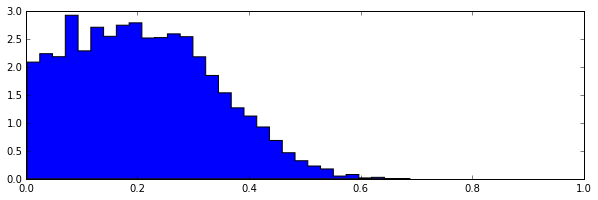

In [219]:
figsize(10, 3)
p_trace = mcmc.trace("freq_cheating")[:]
plt.hist(p_trace, histtype='stepfilled', normed=True, bins=30)
plt.xlim(0, 1)

#Challenger example (with lots to teach) 